## Analytics

In [23]:
query = '''SELECT * FROM indicators.combined_data'''

In [24]:
tbl_econo_insights = wr.athena.read_sql_query(
    query, 
    database="indicators", 
    ctas_approach=False,
    boto3_session=session
)

In [25]:
tbl_econo_insights.fillna('0')

,fecha,inpc,tasa_de_interes,tipo_de_cambio
0,2008-02-01,65.544834,7.5,10.8138
1,2008-03-01,66.019891,0,0
2,2008-04-01,66.170127,7.5,10.5985
3,2008-05-01,66.098635,0,0
4,2008-06-01,66.372168,0,0
...,...,...,...,...
188,2023-10-01,130.609000,11.25,0
189,2023-11-01,131.445000,11.25,17.9305
190,2023-12-01,132.373000,11.25,17.2143
191,2024-01-01,133.555000,11.25,0


In [32]:
tbl_econo_insights = tbl_econo_insights.replace(0, pd.NA)
tbl_econo_insights = tbl_econo_insights.dropna()
print(tbl_econo_insights)


          fecha        inpc  tasa_de_interes  tipo_de_cambio
0    2008-02-01   65.544834             7.50         10.8138
2    2008-04-01   66.170127             7.50         10.5985
5    2008-07-01   66.742059             7.75         10.3908
6    2008-08-01   67.127492             8.00          9.9705
7    2008-09-01   67.584935             8.25         10.3423
..          ...         ...              ...             ...
186  2023-08-01  129.545000            11.25         16.8533
187  2023-09-01  130.120000            11.25         17.1113
189  2023-11-01  131.445000            11.25         17.9305
190  2023-12-01  132.373000            11.25         17.2143
192  2024-02-01  133.681000            11.25         17.1335

[112 rows x 4 columns]


In [34]:
from datetime import datetime
import pandas as pd
import statsmodels.api as sm

# Asumiendo que 'tbl_econo_insights' es tu DataFrame
tbl_econo_insights['fecha'] = pd.to_datetime(tbl_econo_insights['fecha'])
tbl_econo_insights.set_index('fecha', inplace=True)

# Convertir fecha a un valor numérico (días desde la fecha inicial)
X = (tbl_econo_insights.index - tbl_econo_insights.index[0]).days
X = sm.add_constant(X)  # Añadir constante

# Hacer la regresión para INPC
y_inpc = tbl_econo_insights['inpc']
modelo_inpc = sm.OLS(y_inpc, X).fit()
print(modelo_inpc.summary())

                            OLS Regression Results                            
Dep. Variable:                   inpc   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     3215.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           2.91e-83
Time:                        14:08:48   Log-Likelihood:                -297.75
No. Observations:                 112   AIC:                             599.5
Df Residuals:                     110   BIC:                             604.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.6798      0.655     94.142      0.0

In [35]:
# Regresión para tasa_de_interes
y_tasa_interes = tbl_econo_insights['tasa_de_interes']
modelo_tasa_interes = sm.OLS(y_tasa_interes, X).fit()
print(modelo_tasa_interes.summary())


                            OLS Regression Results                            
Dep. Variable:        tasa_de_interes   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     29.85
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           2.93e-07
Time:                        14:09:14   Log-Likelihood:                -236.70
No. Observations:                 112   AIC:                             477.4
Df Residuals:                     110   BIC:                             482.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0183      0.380     10.578      0.0

In [36]:
# Regresión para tipo_de_cambio
y_tipo_cambio = tbl_econo_insights['tipo_de_cambio']
modelo_tipo_cambio = sm.OLS(y_tipo_cambio, X).fit()
print(modelo_tipo_cambio.summary())


                            OLS Regression Results                            
Dep. Variable:         tipo_de_cambio   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     324.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.35e-34
Time:                        14:09:26   Log-Likelihood:                -223.87
No. Observations:                 112   AIC:                             451.7
Df Residuals:                     110   BIC:                             457.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0686      0.339     32.674      0.0

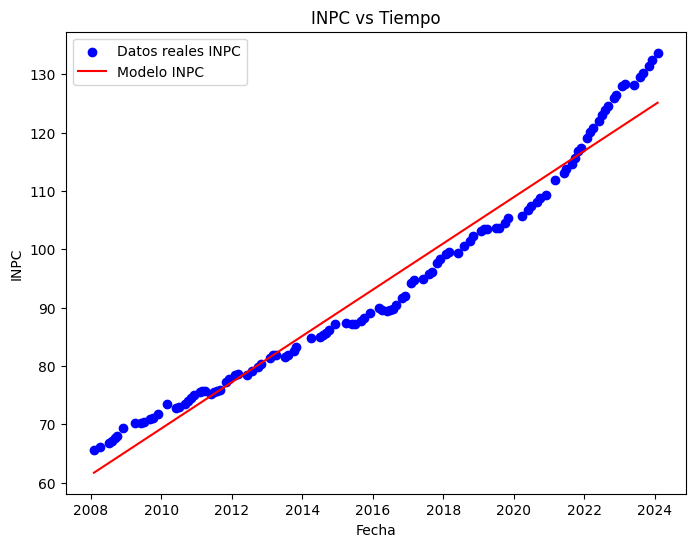

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# INPC
plt.figure(figsize=(8, 6))
plt.scatter(tbl_econo_insights.index, y_inpc, color='blue', label='Datos reales INPC')
plt.plot(tbl_econo_insights.index, modelo_inpc.predict(), color='red', label='Modelo INPC')
plt.xlabel('Fecha')
plt.ylabel('INPC')
plt.title('INPC vs Tiempo')
plt.legend()
plt.show()


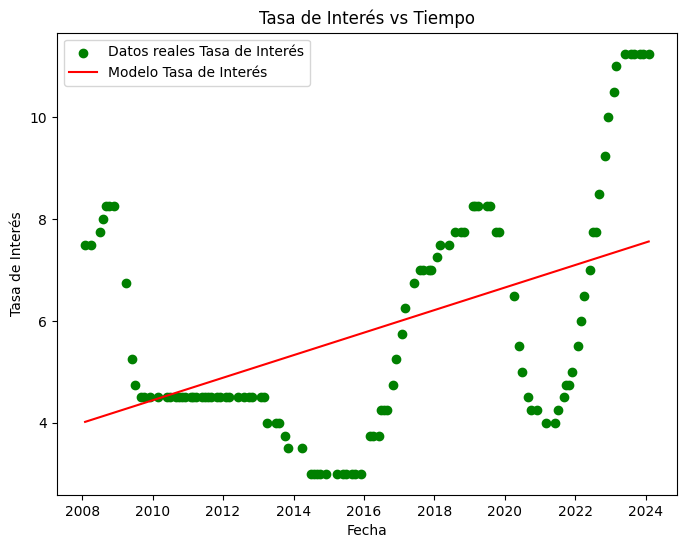

In [40]:

# Tasa de Interés
plt.figure(figsize=(8, 6))
plt.scatter(tbl_econo_insights.index, y_tasa_interes, color='green', label='Datos reales Tasa de Interés')
plt.plot(tbl_econo_insights.index, modelo_tasa_interes.predict(), color='red', label='Modelo Tasa de Interés')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Interés')
plt.title('Tasa de Interés vs Tiempo')
plt.legend()
plt.show()


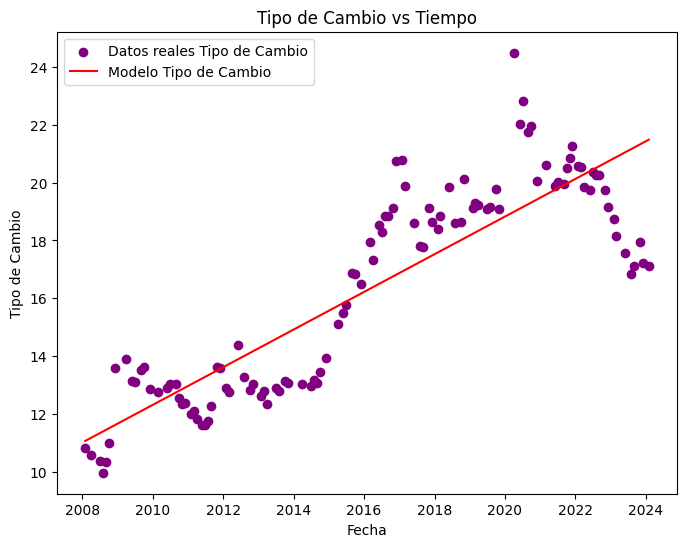

In [41]:

# Tipo de Cambio
plt.figure(figsize=(8, 6))
plt.scatter(tbl_econo_insights.index, y_tipo_cambio, color='purple', label='Datos reales Tipo de Cambio')
plt.plot(tbl_econo_insights.index, modelo_tipo_cambio.predict(), color='red', label='Modelo Tipo de Cambio')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.title('Tipo de Cambio vs Tiempo')
plt.legend()
plt.show()
